In [ ]:
import optimal_transport_V2 as ot
import mass_update_V2 as mu
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scipy.stats import beta
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def runBetaExperiment(Z,m_cont,l_cont,lams,con,freq,numReps,priorConc,plotUpper):
    Y = np.vstack([
        np.column_stack([np.random.beta(con, con, Z - 4*m_cont),
                         np.random.beta(con, con, Z - 4*m_cont)]),
        np.column_stack([np.random.beta(1,l_cont,m_cont),
                         np.random.beta(1,l_cont,m_cont)]),
        np.column_stack([np.random.beta(1,l_cont,m_cont),
                         np.random.beta(l_cont,1,m_cont)]),
        np.column_stack([np.random.beta(l_cont,1,m_cont),
                         np.random.beta(1,l_cont,m_cont)]),
        np.column_stack([np.random.beta(l_cont,1,m_cont),
                         np.random.beta(l_cont,1,m_cont)])
    ])
    N = np.shape(Y)[0]
    density = ot.make_product_beta_density(con,con,con,con,freq,priorConc=priorConc,display=True)

    fig, axes = plt.subplots(len(lams)+1,2,figsize=(10,20))
    axLastA = axes[len(lams),0]
    axLastB = axes[len(lams),1]
    bestObjs = np.zeros(len(lams))

    # NEW: store best weights for each lambda (for post-loop 3D plots)
    best_weights_all = []

    k = 0
    for lam in lams:
        print("Now working on lambda = "+str(lam))
        ax = axes[k,0]
        bestWeights,objVals,wassers,klCosts = mu.mass_update_repeated_runner(
            Y,numReps,np.ones(N),density,"absolute",.5,lam,
            traceCanvas=ax,upperLimOnTracePlot=plotUpper,verbose=True)
        bestObjs[k] = min(wassers)

        ax = axes[k,1]
        sc = ax.scatter(Y[:,0],Y[:,1],c=bestWeights,cmap="viridis",vmin = 0,vmax = plotUpper)
        fig.colorbar(sc,ax=ax,label="Mass")
        ax.set_title("Best Masses over the 10 optimizations")
        axLastA.plot(np.sort(bestWeights),alpha=0.3,label="lambda = "+str(lam))

        # NEW: stash the weights for this lambda
        best_weights_all.append(bestWeights.copy())

        k = k+1

    axLastA.set_title("Best masses over different Lambdas")
    axLastA.legend()
    axLastB.scatter(lams,bestObjs)
    axLastB.set_xlabel("lambda")
    axLastB.set_ylabel("Value of the W2^2 at best")

    plt.suptitle("Beta Product Density: Concentration = "+str(con)+". 1 Uniform Dataset. 10 Mass Inits." )
    plt.tight_layout()
    plt.show()

    # ===== NEW: one 3D figure AFTER the loop, 2 panels per lambda =====
    bins = freq+1
    xedges = np.linspace(0,1,bins+1)
    yedges = np.linspace(0,1,bins+1)
    dx = (xedges[1]-xedges[0])
    dy = (yedges[1]-yedges[0])

    fig3d = plt.figure(figsize=(12, 3.6*len(lams)))
    for i, lam in enumerate(lams):
        w = best_weights_all[i]

        # unweighted counts
        H, _, _  = np.histogram2d(Y[:,0], Y[:,1], bins=[xedges, yedges])
        # weighted counts (by best weights)
        Hw, _, _ = np.histogram2d(Y[:,0], Y[:,1], bins=[xedges, yedges], weights=w)

        # coords for bars
        xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing='ij')
        xpos = xpos.ravel(); ypos = ypos.ravel()
        zpos = np.zeros_like(xpos)
        DX = dx*np.ones_like(xpos); DY = dy*np.ones_like(ypos)

        # left: unweighted
        axL = fig3d.add_subplot(len(lams), 2, 2*i+1, projection='3d')
        axL.bar3d(xpos, ypos, zpos, DX, DY, H.ravel(), shade=True)
        axL.set_xlim(0,1); axL.set_ylim(0,1)
        axL.set_xlabel('x'); axL.set_ylabel('y'); axL.set_zlabel('Count')
        axL.set_title('Original X_data')

        # right: weighted
        axR = fig3d.add_subplot(len(lams), 2, 2*i+2, projection='3d')
        axR.bar3d(xpos, ypos, zpos, DX, DY, Hw.ravel(), shade=True)
        axR.set_xlim(0,1); axR.set_ylim(0,1)
        axR.set_xlabel('x'); axR.set_ylabel('y'); axR.set_zlabel('Weighted count')
        axR.set_title(f'Resampled (λ = {lam})')

    plt.tight_layout()
    plt.show()


Source Density: $Beta(2,2) \times Beta(2,2)$

Data: $Beta(2,2) \times Beta(2,2)$ and contminations $[Beta(1,100), Beta(100,1)]^2$ at each corner; size: 50

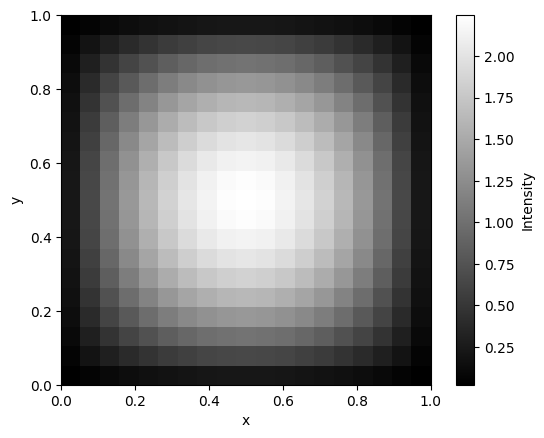

Now working on lambda = 0
The number of iterations is 35
getting the psi
done with psi
The number of iterations is 50
getting the psi
done with psi
The number of iterations is 20
getting the psi
done with psi
The number of iterations is 48
getting the psi
done with psi
The number of iterations is 50
getting the psi
done with psi
The number of iterations is 50
getting the psi
done with psi
The number of iterations is 63
getting the psi
done with psi
The number of iterations is 38
getting the psi
done with psi
The number of iterations is 42
getting the psi
done with psi
The number of iterations is 38
getting the psi
done with psi
Now working on lambda = 10
The number of iterations is 90
getting the psi
done with psi
The number of iterations is 62
getting the psi
done with psi
The number of iterations is 73
getting the psi
done with psi
The number of iterations is 55
getting the psi
done with psi
The number of iterations is 64
getting the psi
done with psi
The number of iterations is 67
g

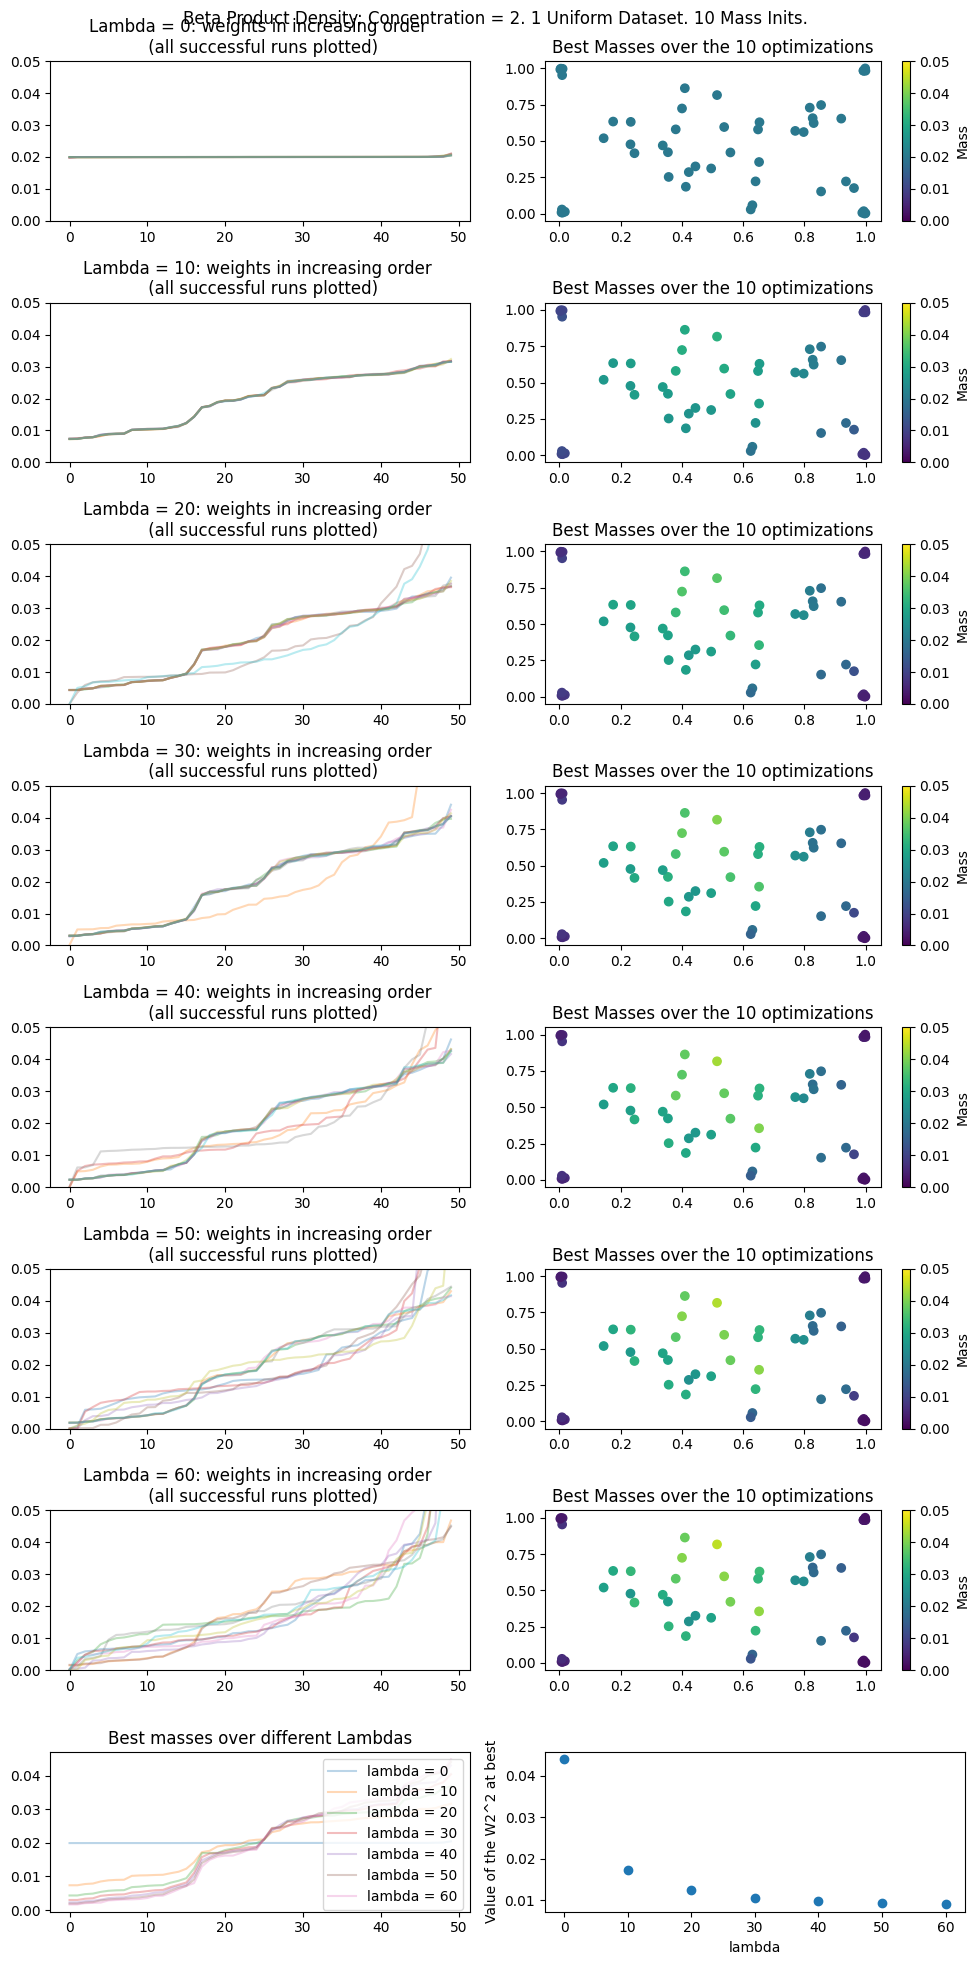

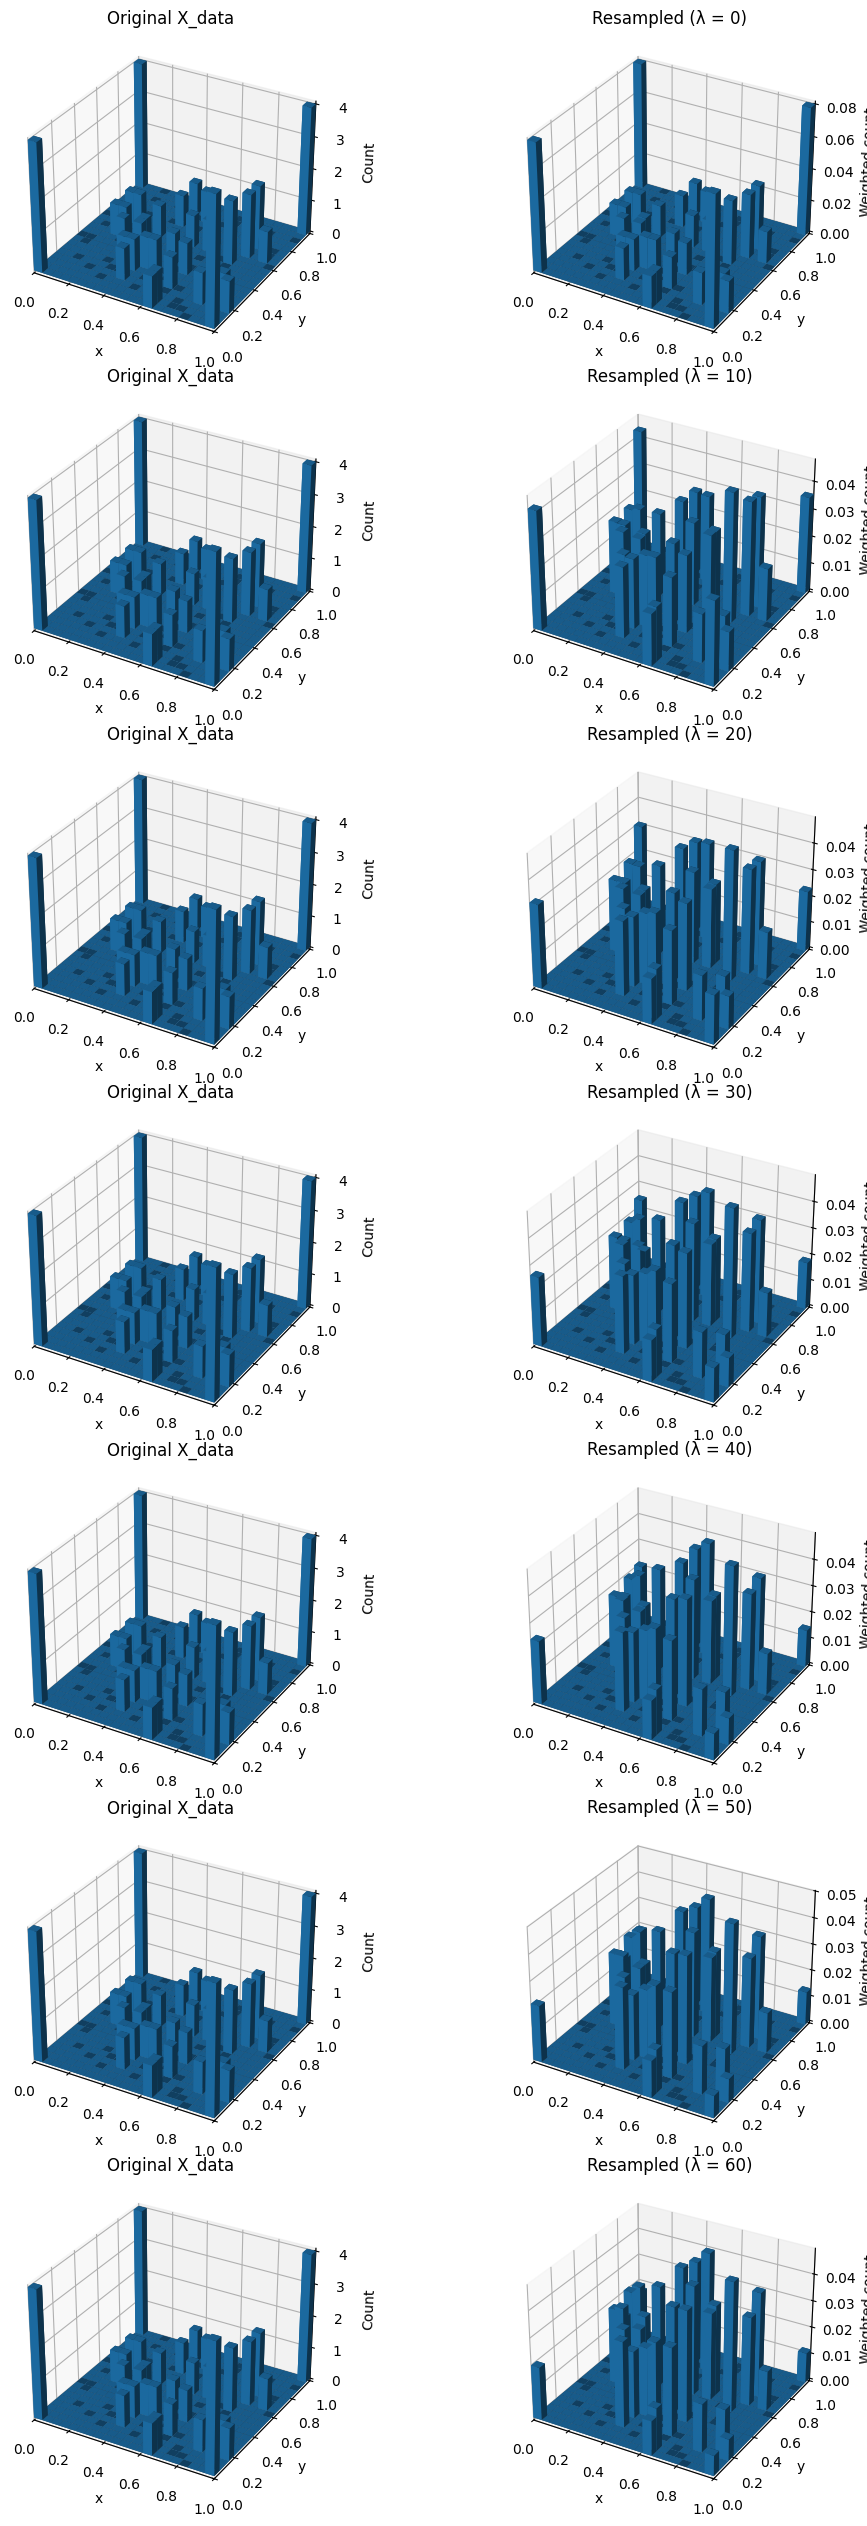

In [74]:
importlib.reload(ot)
importlib.reload(mu)
np.random.seed(1)
Z = 50
l_cont = 100
m_cont = 4
lams = [0,10,20,30,40,50,60]
con = 2 
freq = 20
numReps = 10
priorConc = 0
plotUpper = .05
runBetaExperiment(Z,m_cont,l_cont,lams,con,freq,numReps,priorConc,plotUpper)

Source Density: $Beta(2,2) \times Beta(2,2)$

Data: $Beta(2,2) \times Beta(2,2)$ and contminations $[Beta(1,100), Beta(100,1)]^2$ at each corner; size: 100

In [ ]:
np.random.seed(1)
Z = 100
l_cont = 100
m_cont = 3
lams = [0,10,20,30,40,50,60]
con=2
freq = 20
numReps = 10
runBetaExperiment(Z,m_cont,l_cont,lams,con,freq,numReps)

Source Density: $Beta(2,2) \times Beta(2,2)$

Data: $Beta(2,2) \times Beta(2,2)$ and contminations $[Beta(1,100), Beta(100,1)]^2$ at each corner; size: 300

In [ ]:
importlib.reload(ot)
importlib.reload(mu)

np.random.seed(1)
Z = 300
m_cont = 12
l_cont = 100
#lams = [0,10,20,30,40,50,60]
lams = [0]
con=2
freq = 20
numReps = 10
priorConc = 10
runBetaExperiment(Z,m_cont,l_cont,lams,con,freq,numReps,priorConc)

Source Density: $Beta(2,2) \times Beta(2,2)$

Data: $Beta(2,2) \times Beta(2,2)$ and contminations $[Beta(1,100), Beta(100,1)]^2$ at each corner; size: 1000

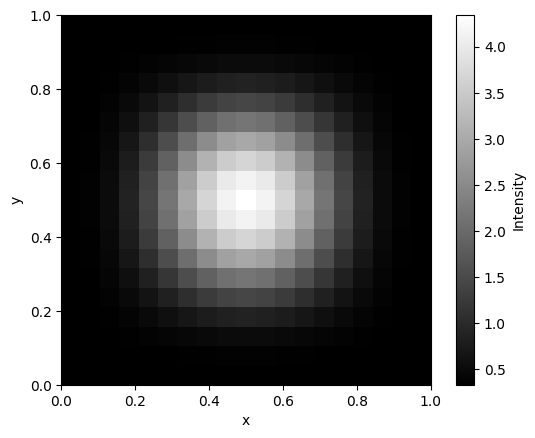

Now working on lambda = 0
The number of iterations is 198
getting the psi
done with psi
The number of iterations is 214
getting the psi
done with psi
The number of iterations is 211
getting the psi
done with psi
The number of iterations is 52
getting the psi
done with psi
The number of iterations is 236
getting the psi
done with psi
The number of iterations is 247
getting the psi
done with psi
The number of iterations is 234
getting the psi
done with psi
The number of iterations is 99
getting the psi
done with psi
The number of iterations is 60
getting the psi
done with psi
The number of iterations is 236
getting the psi
done with psi
Now working on lambda = 10
The number of iterations is 69
getting the psi
done with psi
The number of iterations is 344
getting the psi
done with psi
The number of iterations is 22
getting the psi
done with psi
The number of iterations is 420
getting the psi
done with psi
The number of iterations is 331
getting the psi
done with psi
The number of iteratio

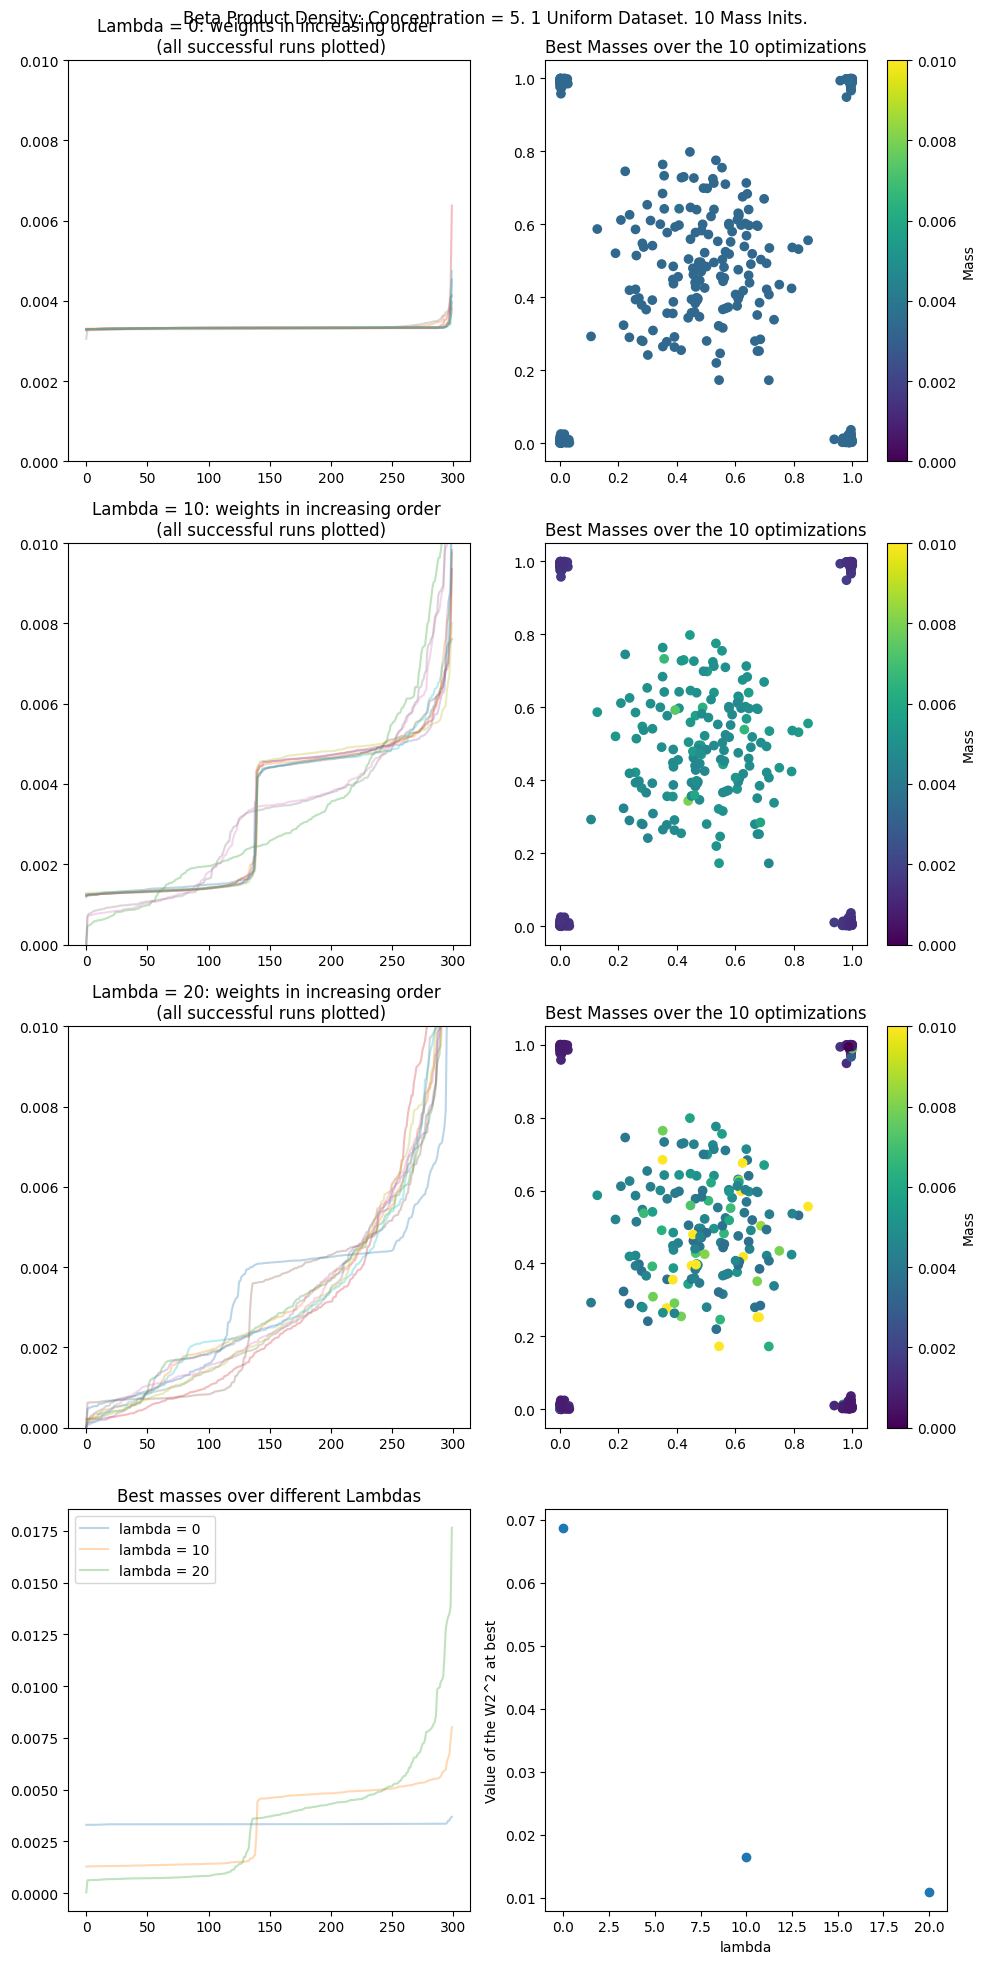

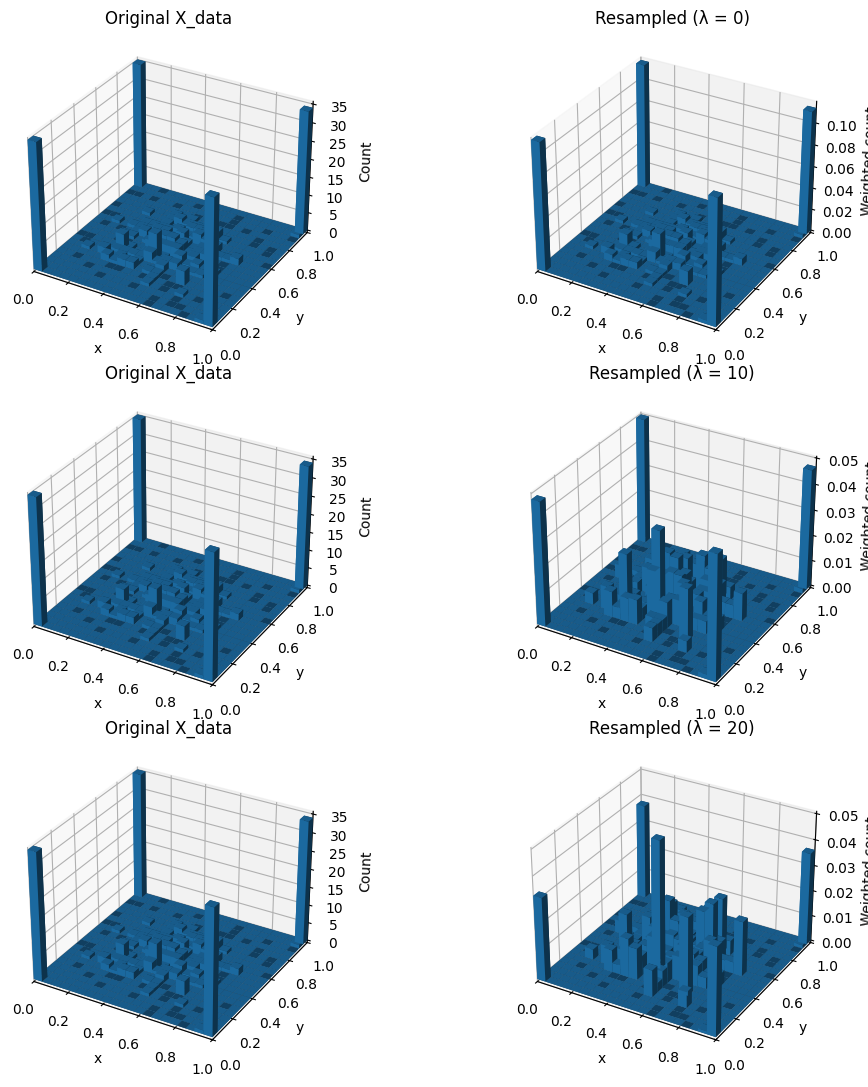

In [81]:
importlib.reload(ot)
importlib.reload(mu)

#np.random.seed(1)
Z = 300
m_cont = 35
l_cont = 100
lams = [0,10,20]
con=5
freq = 20
numReps = 10
priorConc = .5
plotUpper = .01
runBetaExperiment(Z,m_cont,l_cont,lams,con,freq,numReps,priorConc,plotUpper)